In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.spatial import Delaunay

In [2]:
g = 0.25
r=1
H=16
W=4

In [3]:
G0x =  np.arange(0, W,  g)
G0y = np.zeros_like(G0x)
G1y =  np.arange(0, H,  g)
G1x = np.zeros_like(G1y)+W
G2x =  np.arange(W, 0,  -g)
G2y = np.zeros_like(G2x)+H
G3y =  np.arange(H, 0,  -g)
G3x = np.zeros_like(G1y) 
alpha = np.arange(0, 2*np.pi, g/r)
cx =2
cy =3
cx1 = cx 
cy1 = H-3
G4x = cx + r*np.cos(alpha)
G4y = cy + r*np.sin(alpha)
G5x = cx1 + r*np.cos(alpha)
G5y = cy1 + r*np.sin(alpha)

In [4]:
GNodes = np.vstack((np.vstack((G0x, G0y)).T,
                    np.vstack((G1x, G1y)).T,np.vstack((G2x, G2y)).T,np.vstack((G3x, G3y)).T,np.vstack((G4x, G4y)).T,
                    np.vstack((G5x, G5y)).T   ))



(-0.2, 4.2, -0.8, 16.8)

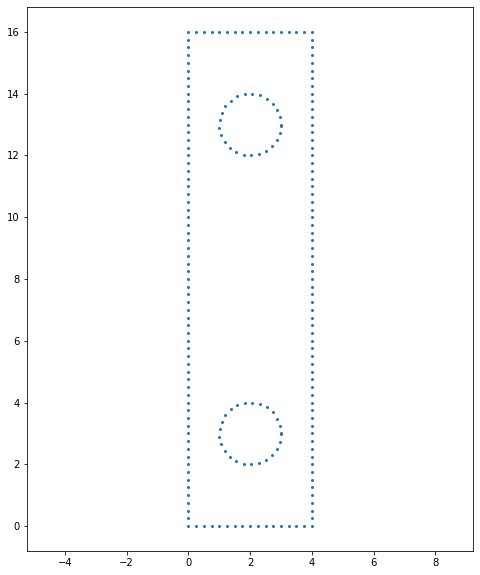

In [5]:
plt.figure(figsize=(8,10))
plt.plot(GNodes[:,0], GNodes[:,1], 'o', markersize=2)
plt.axis('equal')

In [6]:
margin = 0.2

In [7]:
x = np.arange(margin, W ,  margin)
y = np.arange(margin, H ,  margin)
X, Y = np.meshgrid(x, y)

(-0.2, 4.2, -0.8, 16.8)

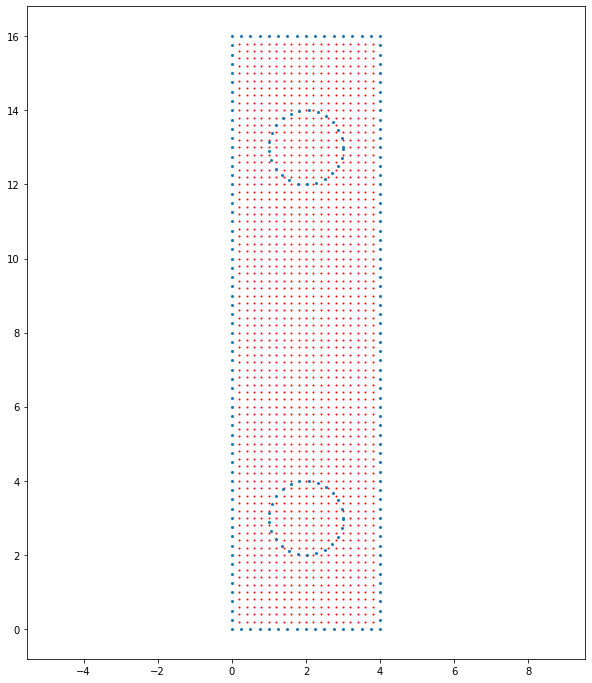

In [8]:
plt.figure(figsize=(10,12))
plt.plot(GNodes[:,0], GNodes[:,1], 'o', markersize=2)
plt.scatter(X, Y, s=1, c='red')
plt.axis('equal')

In [9]:
INodes = np.vstack((X.ravel(), Y.ravel())).T
path = Path(GNodes)
 

In [10]:
mar = 0.1
imask0 = np.sum((INodes - np.array([cx, cy]))**2,axis=1) >= (r + mar)**2
imask1 = np.sum((INodes - np.array([cx1, cy1]))**2,axis=1) >= (r + mar)**2
INodes = INodes[imask0 & imask1]
 

(-0.2, 4.2, -0.8, 16.8)

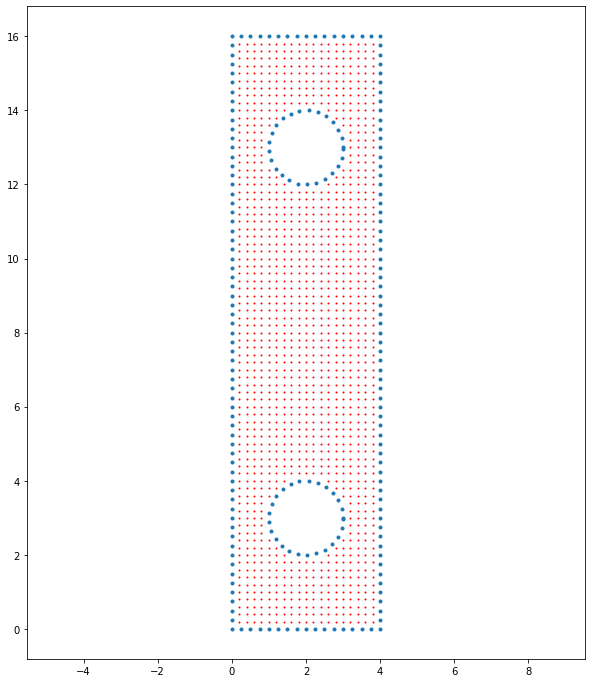

In [11]:
plt.figure(figsize=(10,12))
plt.plot(GNodes[:,0], GNodes[:,1], ".")
plt.scatter(INodes[:,0], INodes[:,1], s=1, c='red')
plt.axis('equal')

In [12]:
Nodes = np.vstack((GNodes, INodes))
tri = Delaunay(Nodes)
Elems = tri.simplices.copy()
emask = np.any(Elems >= Nodes.shape[0] - INodes.shape[0], axis=1)
Elems = Elems[emask]

Nodes.shape[0], Elems.shape[0], Elems.max(), Elems.min()

(1519, 2828, 1518, 0)

(-0.2, 4.2, -0.8, 16.8)

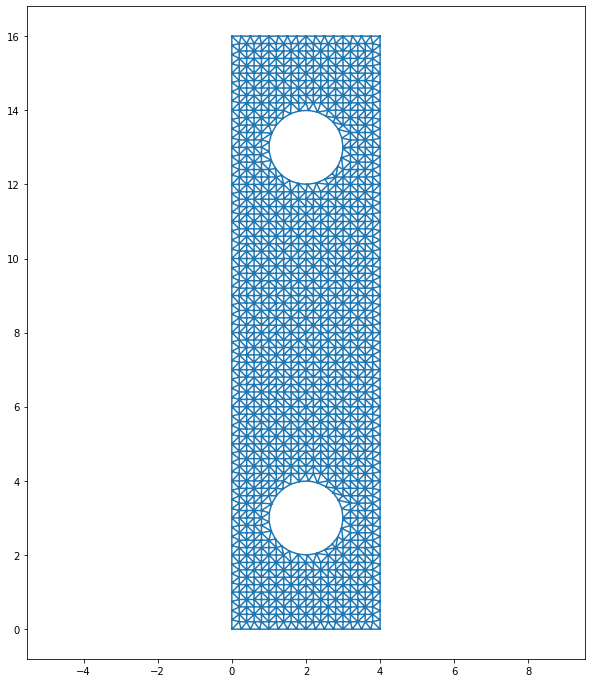

In [13]:
plt.figure(figsize=(10,12))
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.axis('equal')

### Рисунок 1.  
Сетка конечных элементов

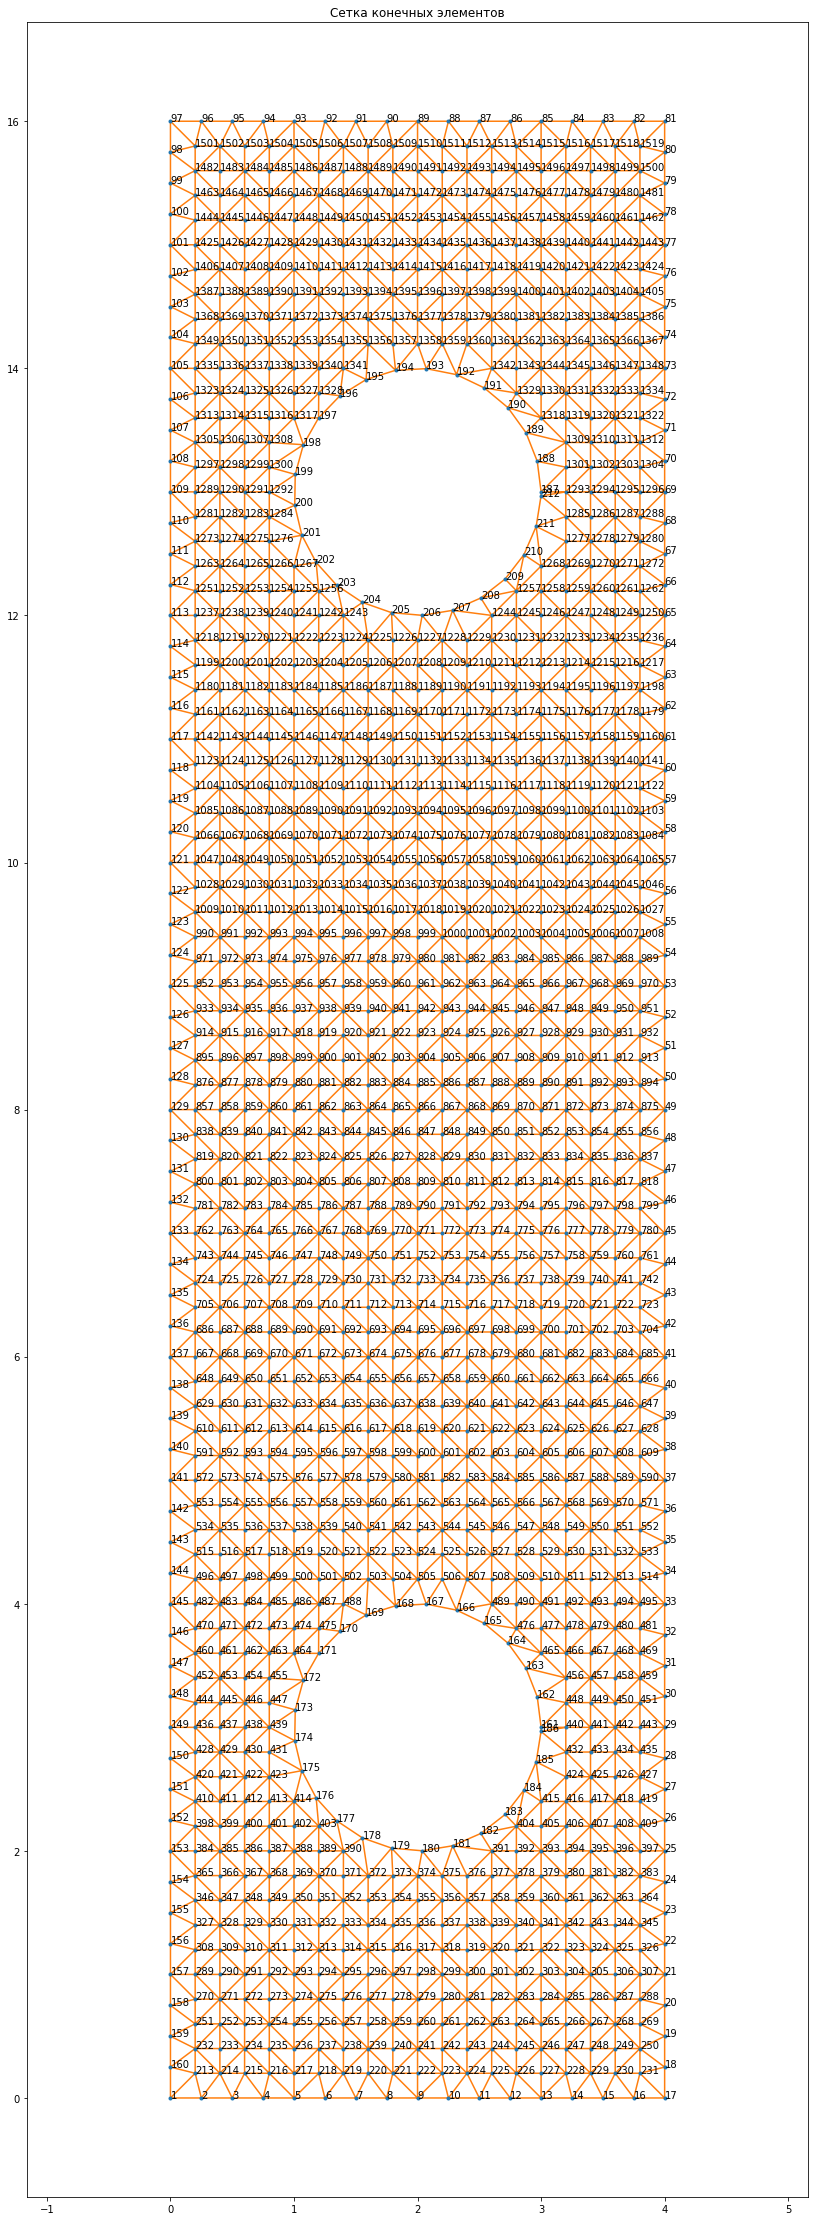

In [14]:
plt.figure(figsize=(14,40))
plt.plot(Nodes[:,0], Nodes[:,1], '.')
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
for i, Node in enumerate(Nodes):
    #if(i%9==0):
    plt.text(Node[0], Node[1], str(i+1))
    
plt.axis('equal')
plt.title("Сетка конечных элементов")
plt.savefig("HW.png")

In [15]:
E = 2e7 # Н/см^2
mu = 0.27
#t = 0.5 # см
#P = 44e3 # Н/см^2
#P = 40e3 # Н/см^2
P = 400/((16*4)-2*np.pi*r**2 )/0.0001
t = 4*0.5 # см # сначала 
Elems.shape


(2828, 3)

In [16]:
Coords = Nodes[Elems]
A = 0.5*np.cross(Coords[:,1]-Coords[:,0], Coords[:,2]-Coords[:,0])
b = np.roll(Coords[:,:,1], -1, axis=1) - np.roll(Coords[:,:,1], 1, axis=1)
c = np.roll(Coords[:,:,0], 1, axis=1) - np.roll(Coords[:,:,0], -1, axis=1)

In [17]:
B = np.zeros((Elems.shape[0],3,6))

B[:,0,0::2] = b
B[:,1,1::2] = c

B[:,2,1::2] = b
B[:,2,0::2] = c

B *= 1/(2*A[:,None,None])


B.shape

(2828, 3, 6)

In [18]:
D = E/(1-mu**2)*np.array([[1, mu, 0],
                          [mu, 1, 0],
                          [0, 0, (1-mu)/2]])
D.shape

(3, 3)

In [19]:
BT = np.transpose(B, axes=(0,2,1))
Ke = BT@D@B
EFT = 2*Elems[:,[0,0,1,1,2,2]] + np.array([0,1,0,1,0,1])

sums = 0
for i in range(Ke.shape[0]):
    sums+=Ke[i].sum(axis=0)
    
Ke.shape

(2828, 6, 6)

In [20]:
K = np.zeros((2*Nodes.shape[0],)*2)

#plus1 = np.array([0,1,0,1,0,1])
#plus1

#for i, e in enumerate(Elems):
    #dof = 2*e[[0,0,1,1,2,2]] + plus1
    #K[EFT[i,None].T, EFT[i]] += Ke[i]

In [21]:
K = np.zeros((2*Nodes.shape[0], 2*Nodes.shape[0]))
for i in range(Elems.shape[0]):
    K[EFT[i, np.newaxis].T,EFT[i]] += Ke[i]
 
K.shape

(3038, 3038)

In [22]:
fixed = np.arange(194,207)
 
force = np.arange(174, 186)


#fixed = np.arange(17)
#fixed = np.hstack((fixed*2, fixed*2+1))
#symm = np.arange(122, GNodes.shape[0]+1)*2+1
#force = np.arange(114, 123)*2

In [23]:
F = np.zeros(2*Nodes.shape[0])

f = 0.5*P*t*(Nodes[163,1]-Nodes[164,1])



In [24]:
dof = np.hstack((fixed*2, fixed*2+1))

K[dof,:] = 0
K[:,dof] = 0
K[dof,dof] = 1

edges_L = np.sqrt(np.sum((Nodes[force[1:]]-Nodes[force[:-1]])**2,axis=1))
edges_F = edges_L * t * P
    
alpha = np.pi/6
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
    #if np.abs(cos_alpha)>1e-10:
F[force[1: ]*2]+=0.5*edges_F*cos_alpha
F[force[:-1]*2]+=0.5*edges_F*cos_alpha
        
    #if np.abs(sin_alpha)>1e-10:
F[force[1: ]*2+1]+=0.5*edges_F*sin_alpha
F[force[:-1]*2+1]+=0.5*edges_F*sin_alpha
    
F[dof] = 0
    
    # расчет перемещений
U = np.linalg.solve(K, F)
np.abs(U).max()

0.06415630349791489

In [25]:
print(force)

[174 175 176 177 178 179 180 181 182 183 184 185]


In [34]:
Ue = U[EFT, None] # матрица перемещений
Eps = np.matmul(B, Ue) # тензор деформаций
Sig = np.matmul(D, Eps) # тензор напряжений
NodeA = np.zeros((Nodes.shape[0],1)) 
NodeSig = np.zeros((Nodes.shape[0],3))
for i, e in enumerate(Elems):
    NodeSig[e] += Sig[i].T*A[i]
    NodeA[e] += A[i]
NodeSig /= NodeA
NodeS1 = 0.5*(NodeSig[:,0]+NodeSig[:,1])+\
        np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)
    
print(U.shape, K.shape)

(3038,) (3038, 3038)


In [27]:
scale = 20

ResNodes = Nodes + scale*U.reshape(-1, 2)

(-0.38020045695932636,
 5.549484225806427,
 -1.007952183812983,
 16.94675019626099)

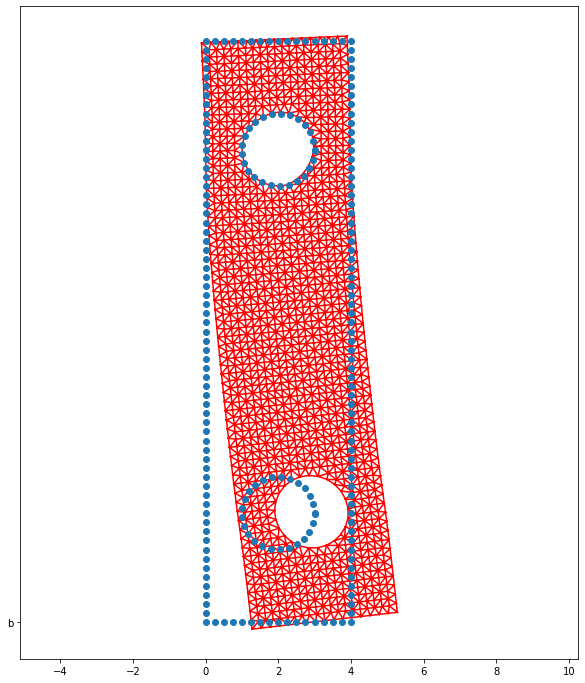

In [28]:
plt.figure(figsize=(10,12))
plt.triplot(ResNodes[:,0], ResNodes[:,1],  Elems, color='r')
plt.plot(GNodes[:,0], GNodes[:,1], "o",'b')
plt.axis('equal')

(1519, 2) (2828, 3) (12,)
[-3223.25911145  1542.61464441  6308.48840026 11074.36215612
 15840.23591198 20606.10966783 25371.98342369 30137.85717955
 34903.7309354  39669.60469126 44435.47844712 49201.35220298]


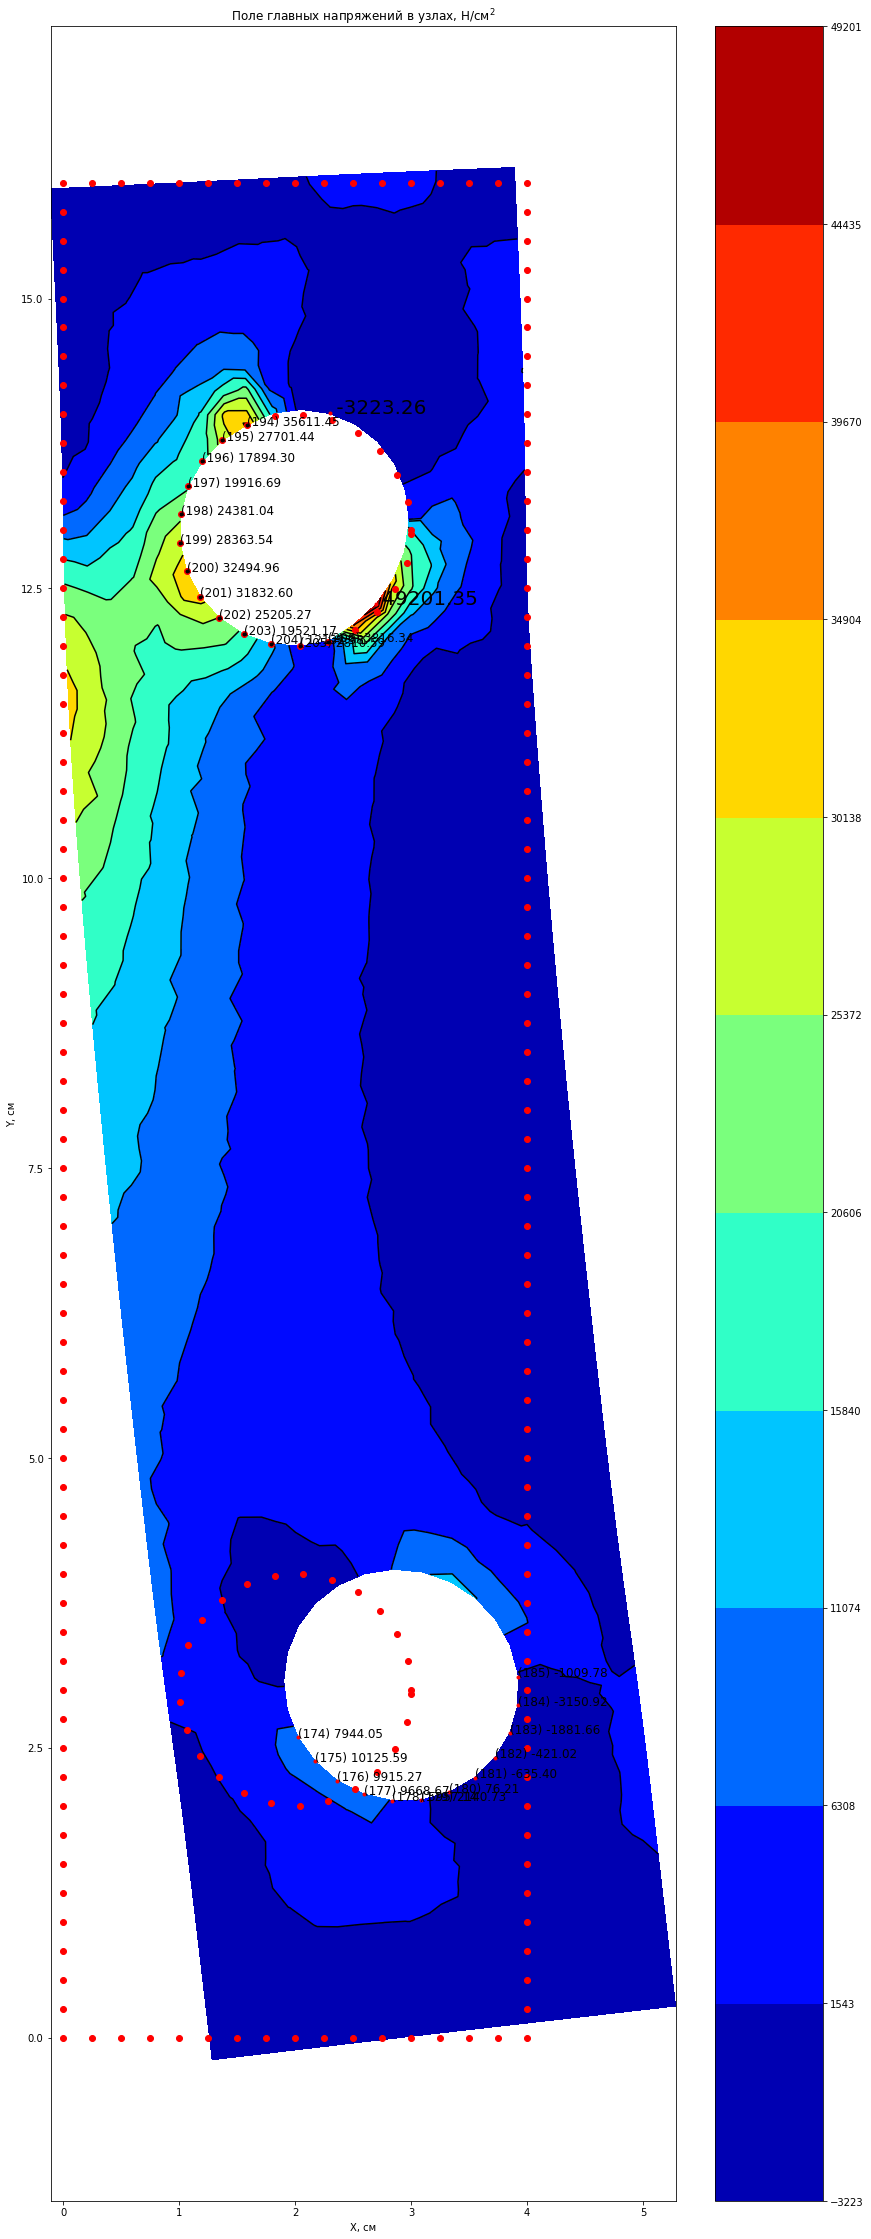

In [37]:
i_max = np.argmax(NodeS1)
i_min = np.argmin(NodeS1)
plt.figure(figsize=(14,40))
levels = np.linspace(NodeS1[i_min], NodeS1[i_max], 12)
handle = plt.tricontourf(ResNodes[:,0], ResNodes[:, 1], Elems, NodeS1.ravel(), cmap='jet',levels=levels)
plt.tricontour(ResNodes[:, 0], ResNodes[:, 1], Elems, 
                  NodeS1.ravel(), colors='k', levels=levels)

print(ResNodes.shape, Elems.shape, levels.shape)
print(levels)

plt.plot(GNodes[:,0], GNodes[:,1],'o', c ='r')
plt.plot(ResNodes[i_max,0], ResNodes[i_max,1], '.r')
plt.text(ResNodes[i_max,0], ResNodes[i_max,1], ' %.2f'%NodeS1[i_max],fontsize=20)
plt.plot(ResNodes[i_min,0], ResNodes[i_min,1], '.r')
plt.text(ResNodes[i_min,0], ResNodes[i_min,1], ' %.2f'%NodeS1[i_min],fontsize=20)
    
for elem in fixed:
    plt.plot(ResNodes[elem,0],ResNodes[elem,1],'.k')
    plt.text(ResNodes[elem,0],ResNodes[elem,1],'({}) {:.2f}'.format(elem,NodeS1[elem]),fontsize=12)
    
for elem in force:
    plt.plot(ResNodes[elem,0],ResNodes[elem,1],'.r')
    plt.text(ResNodes[elem,0],ResNodes[elem,1],'({}) {:.2f}'.format(elem,NodeS1[elem]),fontsize=12)
    
cb = plt.gcf().colorbar(handle)
cb.set_ticks(levels)
plt.title('Поле главных напряжений в узлах, Н/см$^2$')
plt.xlabel('X, см')
plt.ylabel('Y, см')
plt.axis('equal')
plt.savefig("all_t.png")

In [36]:
def f(t):
    # расчет матрицы градиентов

    # расчет силы, действующей на элементы
    F = np.zeros(2*Nodes.shape[0])
    edges_L = np.sqrt(np.sum((Nodes[force[1:]]-Nodes[force[:-1]])**2,axis=1))
    edges_F = edges_L * t * P
    
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    #if np.abs(cos_alpha)>1e-10:
    F[force[1: ]*2]+=0.5*edges_F*cos_alpha
    F[force[:-1]*2]+=0.5*edges_F*cos_alpha
        
    #if np.abs(sin_alpha)>1e-10:
    F[force[1: ]*2+1]+=0.5*edges_F*sin_alpha
    F[force[:-1]*2+1]+=0.5*edges_F*sin_alpha
    
    F[dof] = 0
    
    # расчет перемещений
    U = np.linalg.solve(K, F)
    
    # расчет напряжений и главных напряжений
    Ue = U[EFT, None] # матрица перемещений
    Eps = np.matmul(B, Ue) # тензор деформаций
    Sig = np.matmul(D, Eps) # тензор напряжений
    NodeA = np.zeros((Nodes.shape[0],1)) 
    NodeSig = np.zeros((Nodes.shape[0],3))
    for i, e in enumerate(Elems):
        NodeSig[e] += Sig[i].T*A[i]
        NodeA[e] += A[i]
    NodeSig /= NodeA
    NodeS1 = 0.5*(NodeSig[:,0]+NodeSig[:,1])+\
         np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)
    
    
    return np.max(NodeS1)
    #return U, NodeS1    

In [31]:
sT = 3e4

In [32]:
import scipy.optimize

#mint_t = scipy.optimize.root(lambda t:(f(t)-sT), 1e2)['x'][0]

In [33]:
scipy.optimize.fminbound(lambda t:(f(t)-sT)**2, 
                         1e-5, 1e5, full_output=True)

(1.2194786792133736, 3.0493186101154812e-18, 0, 24)